# Live 01 - 29 Setembro 2023

In [1]:
import polars as pl
import seaborn as sns

In [2]:
df = pl.read_csv('data/StudentsPerformance.csv', separator=';')
df.head()

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""female""","""group B""","""bachelor's deg…","""standard""","""none""",72,72,74
"""female""","""group C""","""some college""","""standard""","""completed""",69,90,88
"""female""","""group B""","""master's degre…","""standard""","""none""",90,95,93
"""male""","""group A""","""associate's de…","""free/reduced""","""none""",47,57,44
"""male""","""group C""","""some college""","""standard""","""none""",76,78,75


In [3]:
df_filtrado = df.select(
    pl.col("race/ethnicity") == "group B"
)
df_filtrado

race/ethnicity
bool
true
false
true
false
false
true
true
true
false


In [4]:
df_filtrado = df.select(
    pl.col("gender"),
    pl.when(pl.col("math score") > 50)
    .then(pl.lit("Aprovado"))
    .otherwise(pl.lit("Reprovado"))
    .alias("Status - Resultado"),
)
df_filtrado

gender,Status - Resultado
str,str
"""female""","""Aprovado"""
"""female""","""Aprovado"""
"""female""","""Aprovado"""
"""male""","""Reprovado"""
"""male""","""Aprovado"""
"""female""","""Aprovado"""
"""female""","""Aprovado"""
"""male""","""Reprovado"""
"""male""","""Aprovado"""


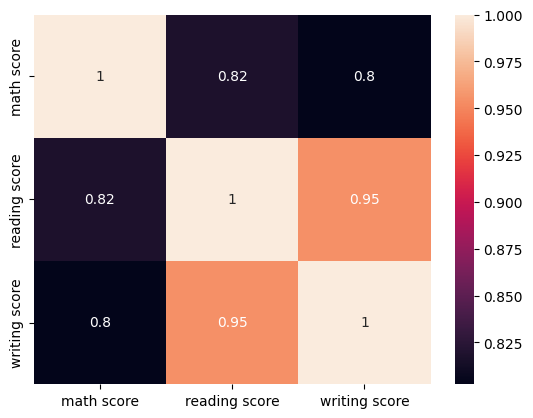

In [17]:
df_aux = df.select(
    pl.col(pl.Int64)
).to_pandas()
sns.heatmap(df_aux.corr(), annot=True);

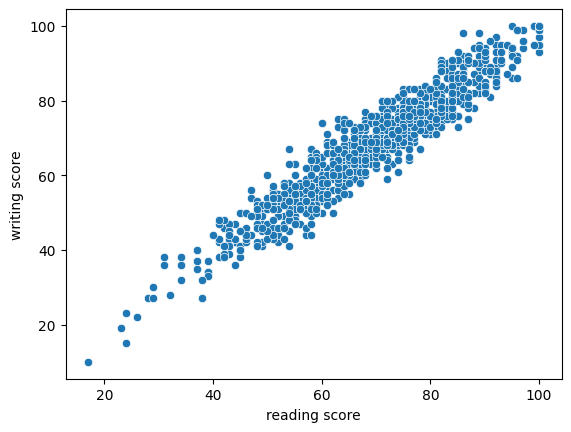

In [21]:
df_aux = df.select(
    pl.col(['reading score', 'writing score'])
).to_pandas()
sns.scatterplot(data=df_aux, x='reading score', y='writing score');

/Users/zfab/.pyenv/versions/3.10.8/envs/postech/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


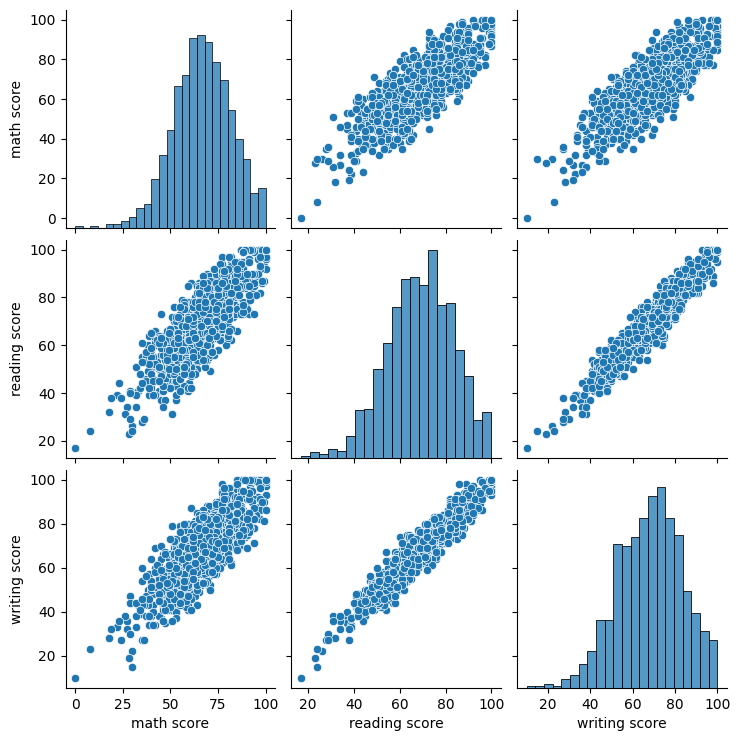

In [22]:
df_aux = df.select(
    pl.col(pl.Int64)
).to_pandas()
sns.pairplot(df_aux);